In [5]:
%pip install cleanlab
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/25.8 MB ? eta -:--:--
                                              0.4/25.8 MB 7.8 MB/s eta 0:00:04
     --                                       1.7/25.8 MB 17.9 MB/s eta 0:00:02
     -----                                    3.4/25.8 MB 23.9 MB/s eta 0:00:01
     -------                                  4.8/25.8 MB 25.7 MB/s eta 0:00:01
     ---------                                6.4/25.8 MB 27.5 MB/s eta 0:00:01
     ------------                             8.0/25.8 MB 28.3 MB/s eta 0:00:01
     --------------                           9.4/25.8 MB 28.6 MB/s eta 0:00:01
     ----------------                        10.9/25.8 MB 32.7 MB/s eta 0:00:01
     -------------------                     12.7/25.8 MB 34.4 MB/s eta 0:00:01
     ---------------------                   14.4/25.8 MB 34.4 MB/s eta 0:00:01
     ------------------------                16.0/25.8 MB 34.6 MB/s eta 0:00:01
     --------------------------              17.8


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import requests
import io
# Download the dataset from the provided URL
url_train = 'https://public.jacob.al/imd3011-datacentric_ai/hackathon-2025-2/train_no_labels.json.gz'
url_valid = 'https://public.jacob.al/imd3011-datacentric_ai/hackathon-2025-2/valid.json.gz'

response_train = requests.get(url_train)
response_valid = requests.get(url_valid)

# Read the JSON data into pandas DataFrames
train_data = pd.read_json(io.BytesIO(response_train.content), compression='gzip')
valid_data = pd.read_json(io.BytesIO(response_valid.content), compression='gzip')


### Analise do dataset


In [9]:
# Ver as primeiras linhas de cada dataset
print("Train:")
display(train_data.head())
print("\nValid:")
display(valid_data.head())

# Dimensões dos datasets
print("Train shape:", train_data.shape)
print("Valid shape:", valid_data.shape)


Train:


,image,label,uid
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",I,32e9d51d-8a22-4f97-9955-8f9647a7f13c
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",VII,a7c9faf9-a7e2-4687-a57b-ac0558ccee8b
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,0baccef4-de79-4f71-b7ec-c77cc2ab9e50
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",IX,81fe9a13-d0fe-43ad-8185-c59ea6117cce
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,92e3b890-c9ab-4e9c-a63b-ad42de92e5a2



Valid:


,image,label,is_noisy,uid
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",II,0,d58ccd8d-65b1-4f7d-914b-50ce98c1bbeb
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",V,0,ecccff0d-f2c1-479d-9703-ce18b1635ceb
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",III,0,e04c4f02-0a19-4020-a028-e2ed56d2f081
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",X,0,c0d36cb6-9914-44d4-b7d6-2460cbb599fb
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",I,0,5dfbdf79-2474-44fb-8942-096a3731b4be


Train shape: (2406, 3)
Valid shape: (425, 4)


In [10]:
print("Train columns:", train_data.columns.tolist())
print("Valid columns:", valid_data.columns.tolist())


Train columns: ['image', 'label', 'uid']
Valid columns: ['image', 'label', 'is_noisy', 'uid']


In [11]:
print(valid_data['label'].value_counts())
print(valid_data['label'].unique())


label
IV      58
I       53
IX      49
II      42
VII     42
X       41
VI      41
VIII    36
V       32
III     31
Name: count, dtype: int64
['II' 'V' 'III' 'X' 'I' 'IV' 'VI' 'VIII' 'VII' 'IX']


In [12]:
print(train_data.dtypes)


image    object
label    object
uid      object
dtype: object


In [15]:
print(train_data.columns.tolist())
print(valid_data.columns.tolist())


['image', 'label', 'uid']
['image', 'label', 'is_noisy', 'uid']


In [14]:
print(train_data.isnull().sum())
print(valid_data.isnull().sum())


image    0
label    0
uid      0
dtype: int64
image       0
label       0
is_noisy    0
uid         0
dtype: int64


In [16]:
print("Exemplo de linha (treino):")
print(train_data.iloc[0])
print("\nTipo da coluna 'image':", type(train_data.iloc[0]['image']))
print("Tamanho do vetor 'image':", len(train_data.iloc[0]['image']))


Exemplo de linha (treino):
image    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
label                                                    I
uid                   32e9d51d-8a22-4f97-9955-8f9647a7f13c
Name: 0, dtype: object

Tipo da coluna 'image': <class 'list'>
Tamanho do vetor 'image': 215


In [17]:
print("Distribuição dos rótulos no treino (possível ruído):")
print(train_data['label'].value_counts())
print("\nDistribuição dos rótulos na validação (rótulo correto):")
print(valid_data['label'].value_counts())


Distribuição dos rótulos no treino (possível ruído):
label
IV      304
I       282
IX      260
VIII    246
V       242
III     225
VI      222
VII     221
X       208
II      196
Name: count, dtype: int64

Distribuição dos rótulos na validação (rótulo correto):
label
IV      58
I       53
IX      49
II      42
VII     42
X       41
VI      41
VIII    36
V       32
III     31
Name: count, dtype: int64


In [19]:
shapes = train_data['image'].apply(lambda x: np.array(x).shape)
print(shapes.value_counts())


image
(232, 240)    11
(232, 232)    10
(264, 280)     9
(253, 247)     8
(242, 247)     8
              ..
(219, 273)     1
(347, 506)     1
(231, 300)     1
(336, 451)     1
(268, 236)     1
Name: count, Length: 1669, dtype: int64


In [20]:
import numpy as np

TARGET_SHAPE = (232, 240)

def pad_or_crop(img, target_shape=TARGET_SHAPE):
    img = np.array(img)
    h, w = img.shape
    th, tw = target_shape
    # Pad
    padded = np.zeros(target_shape, dtype=img.dtype)
    img = img[:th, :tw]
    ph, pw = img.shape
    padded[:ph, :pw] = img
    return padded

# Para treino
train_data['image_fixed'] = train_data['image'].apply(lambda x: pad_or_crop(x))
train_data['image_flat'] = train_data['image_fixed'].apply(lambda x: x.flatten())

# Para validação
valid_data['image_fixed'] = valid_data['image'].apply(lambda x: pad_or_crop(x))
valid_data['image_flat'] = valid_data['image_fixed'].apply(lambda x: x.flatten())

X_train = np.stack(train_data['image_flat'].to_list())
y_train = train_data['label'].to_numpy()
X_val = np.stack(valid_data['image_flat'].to_list())
y_val = valid_data['label'].to_numpy()


In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

probs = clf.predict_proba(X_val)
preds = clf.predict(X_val)


In [22]:
import pandas as pd

confidence = probs.max(axis=1)
valid_data['pred'] = preds
valid_data['confidence'] = confidence

# Top 10 mais incertas
low_conf = valid_data.nsmallest(10, 'confidence')
print(low_conf[['uid', 'label', 'pred', 'confidence']])


                                      uid label  pred  confidence
11   c4c12b70-2122-4fa9-9053-d1a6aaec9928    IV    IV    0.140000
355  19a79188-eb36-4af7-bdeb-53a35cb86cb8     I     I    0.140894
94   37f79943-4ed4-49a8-8409-2b89b0a0665c    IV    IX    0.141641
314  24644e4e-ae81-407e-a94a-b63d655bc421    IV   VII    0.150000
383  a6eb2773-66eb-4fa3-bcfa-5200585fe147    VI  VIII    0.150000
405  39c72c93-a319-406e-bbad-131d7b388f61    IX    II    0.150000
420  2e631889-a3b1-44bb-bed5-de33897f129d  VIII  VIII    0.150000
352  4bb42b00-3005-441b-bd79-c7429d43311f    IX    IX    0.150588
34   1429c7a4-9b9b-40bc-b2f7-9642df383894     V   III    0.160000
147  f48cb303-adb6-4dee-9d51-50dbeb877197  VIII    IV    0.160000


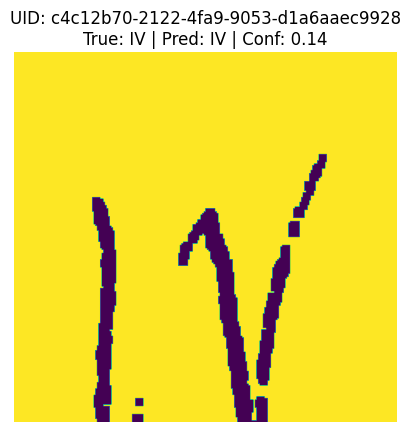

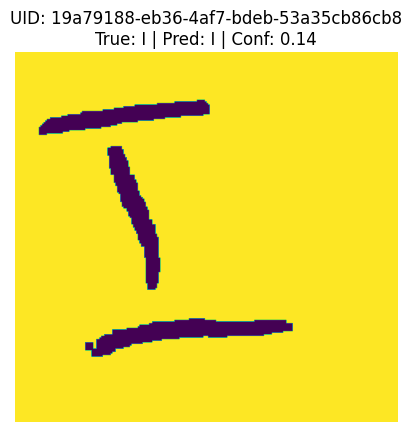

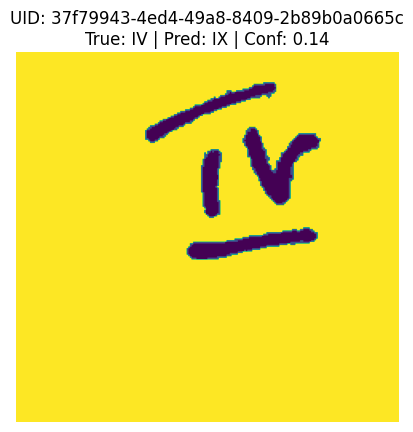

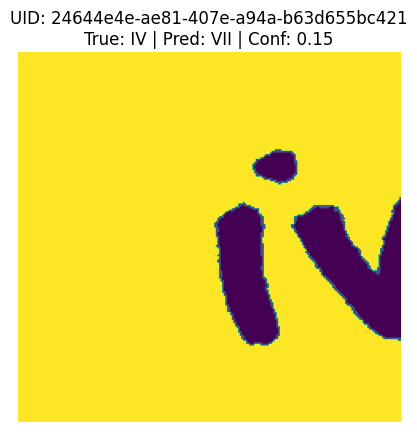

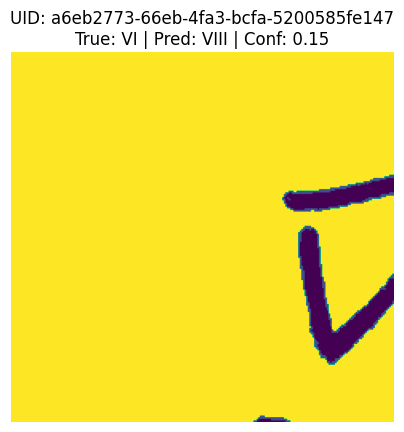

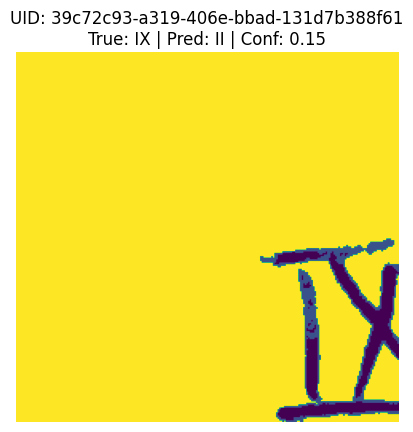

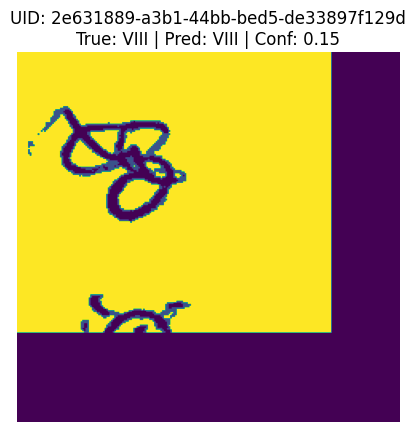

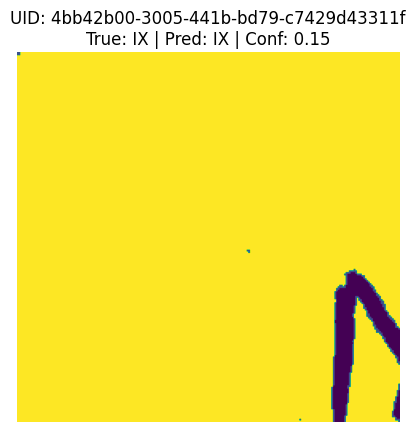

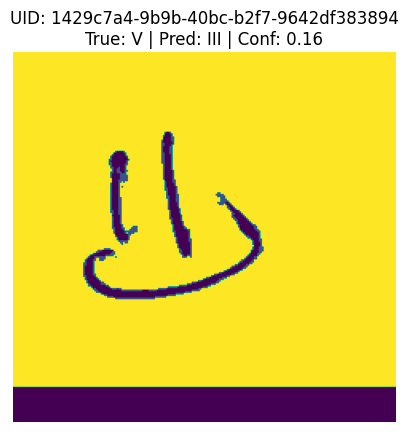

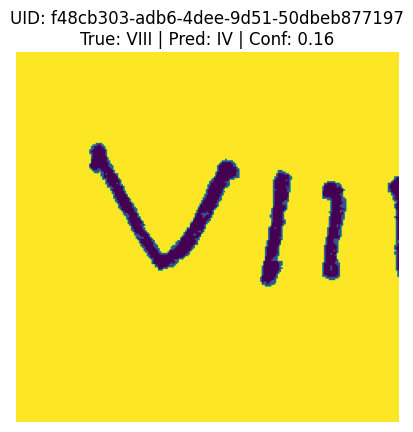

In [23]:
import matplotlib.pyplot as plt
import numpy as np

for uid in low_conf['uid']:
    row = valid_data[valid_data['uid'] == uid].iloc[0]
    plt.imshow(np.array(row['image_fixed']), cmap='viridis')
    plt.title(f"UID: {uid}\nTrue: {row['label']} | Pred: {row['pred']} | Conf: {row['confidence']:.2f}")
    plt.axis('off')
    plt.show()


In [24]:
%pip install cleanlab



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from cleanlab.classification import CleanLearning
from cleanlab.filter import find_label_issues

# X_train e y_train já devem estar preparados (imagem flattened e label)


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_int = le.fit_transform(y_train)  # Agora de 0 até n_classes-1
print(le.classes_)  # Mostra a ordem das classes (ex: ['I' 'II' ... 'X'])


['I' 'II' 'III' 'IV' 'IX' 'V' 'VI' 'VII' 'VIII' 'X']


In [30]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train_int)
probs_train = clf.predict_proba(X_train)


Confiança média: 0.7104068324536096
Confiança mínima: 0.53
Confiança máxima: 1.0


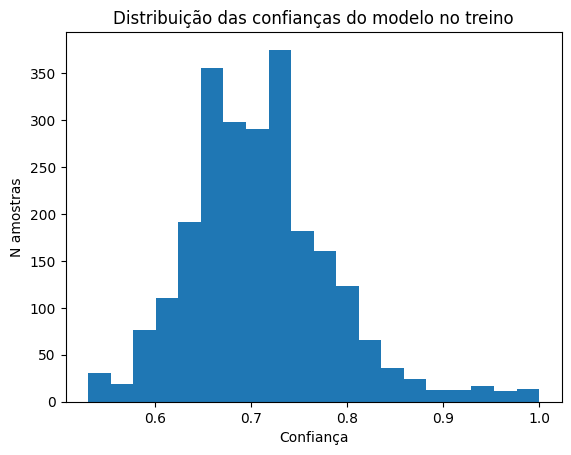

In [33]:
conf = probs_train.max(axis=1)
print("Confiança média:", np.mean(conf))
print("Confiança mínima:", np.min(conf))
print("Confiança máxima:", np.max(conf))
import matplotlib.pyplot as plt
plt.hist(conf, bins=20)
plt.title('Distribuição das confianças do modelo no treino')
plt.xlabel('Confiança')
plt.ylabel('N amostras')
plt.show()


In [35]:
issues_entropy = find_label_issues(
    labels=y_train_int,
    pred_probs=probs_train,
    return_indices_ranked_by='confidence_weighted_entropy'
)
print(f"Suspeitos com 'confidence_weighted_entropy': {len(issues_entropy)}")




Suspeitos com 'confidence_weighted_entropy': 0


In [36]:
# Menor confiança no treino
conf_train = probs_train.max(axis=1)
idx_low_conf_train = np.argsort(conf_train)[:20]
for idx in idx_low_conf_train:
    print(f"Idx: {idx}, Label: {le.inverse_transform([y_train_int[idx]])[0]}, Conf: {conf_train[idx]:.2f}")


Idx: 1445, Label: V, Conf: 0.53
Idx: 1930, Label: IV, Conf: 0.53
Idx: 811, Label: IX, Conf: 0.53
Idx: 1848, Label: III, Conf: 0.54
Idx: 2333, Label: IV, Conf: 0.54
Idx: 160, Label: III, Conf: 0.54
Idx: 1682, Label: VIII, Conf: 0.55
Idx: 1988, Label: III, Conf: 0.55
Idx: 1735, Label: II, Conf: 0.55
Idx: 1000, Label: V, Conf: 0.55
Idx: 1313, Label: I, Conf: 0.55
Idx: 1023, Label: V, Conf: 0.55
Idx: 489, Label: I, Conf: 0.55
Idx: 1561, Label: X, Conf: 0.55
Idx: 1051, Label: I, Conf: 0.55
Idx: 964, Label: I, Conf: 0.55
Idx: 1579, Label: IX, Conf: 0.55
Idx: 1743, Label: I, Conf: 0.55
Idx: 946, Label: I, Conf: 0.55
Idx: 1923, Label: V, Conf: 0.55


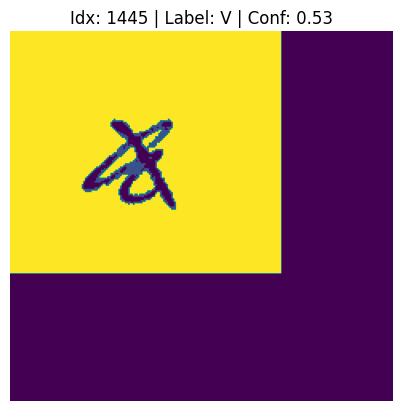

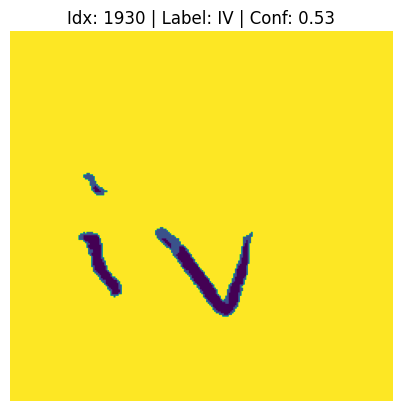

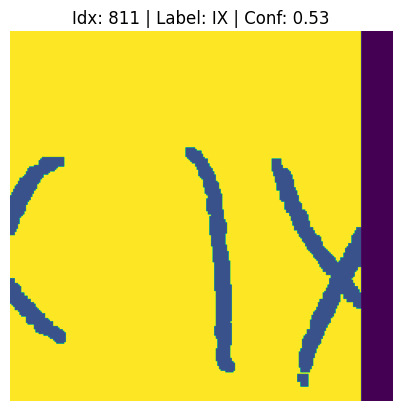

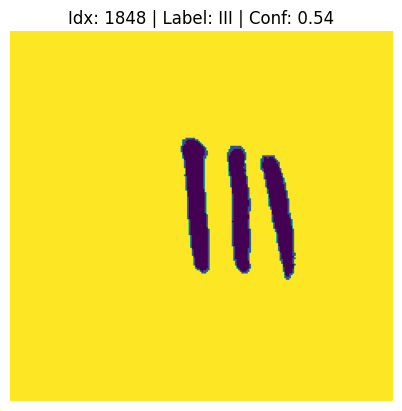

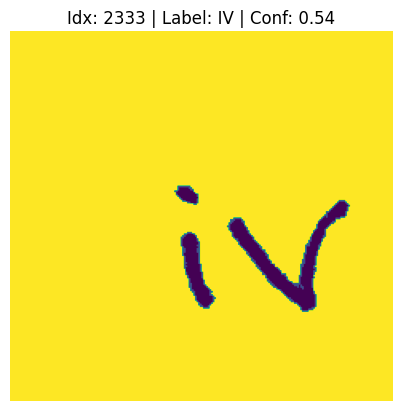

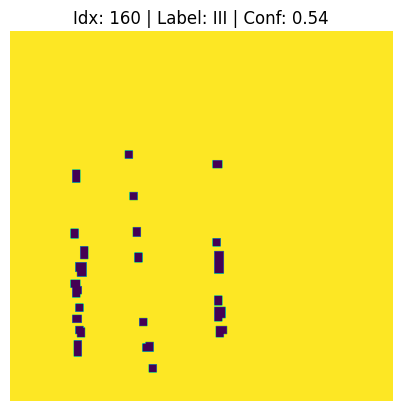

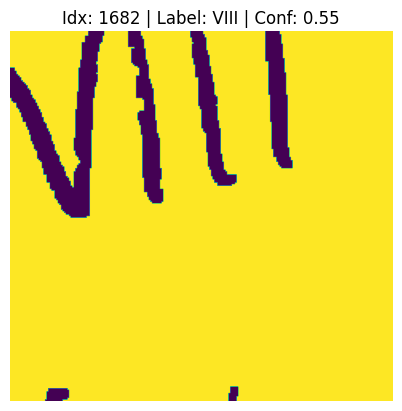

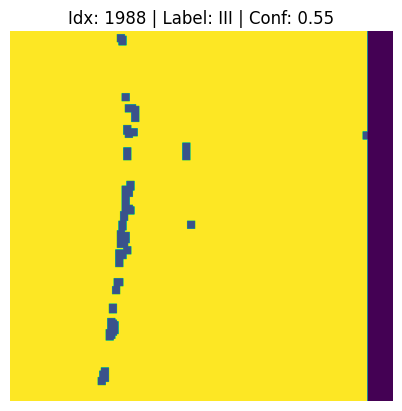

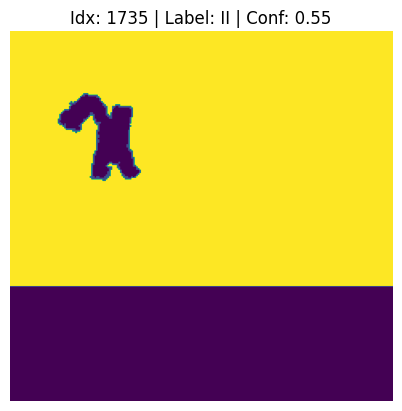

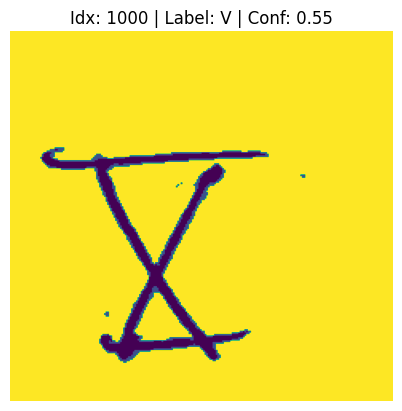

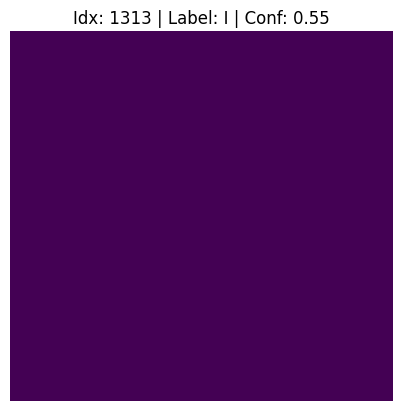

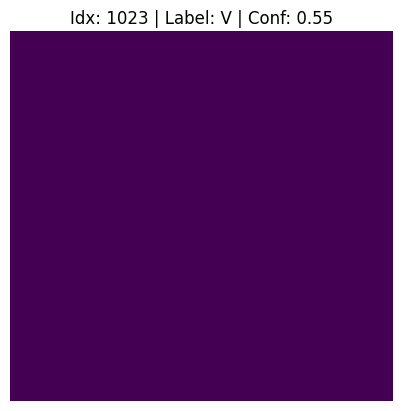

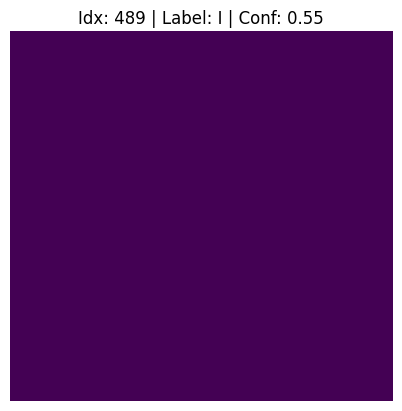

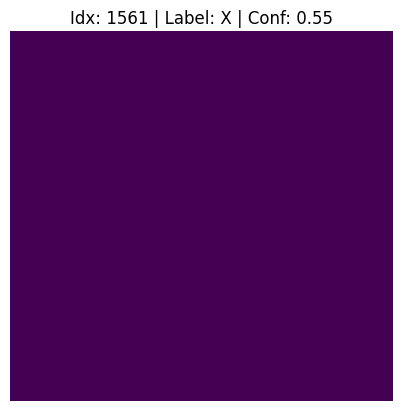

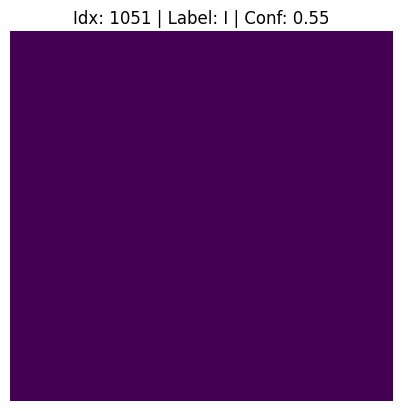

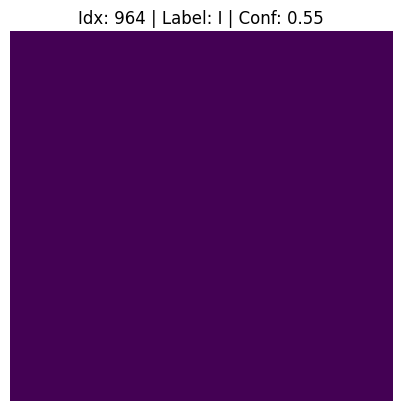

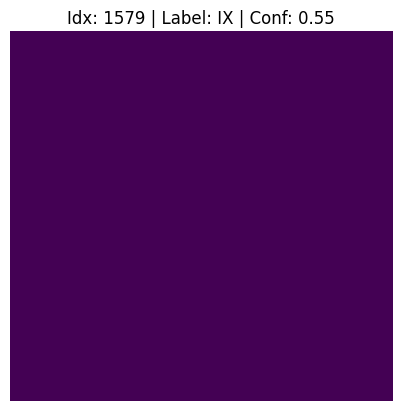

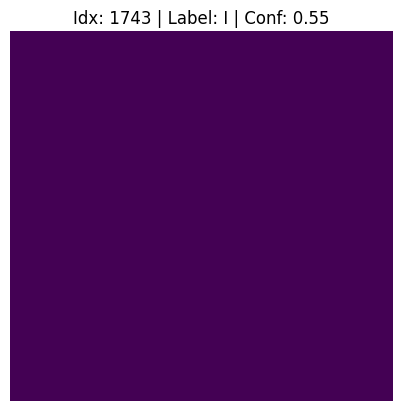

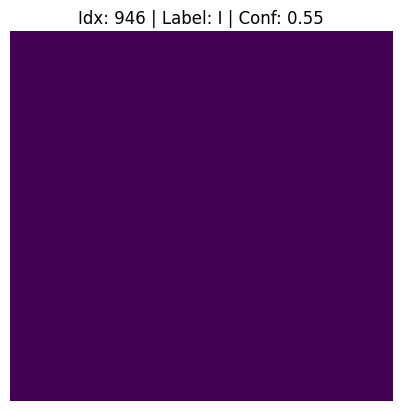

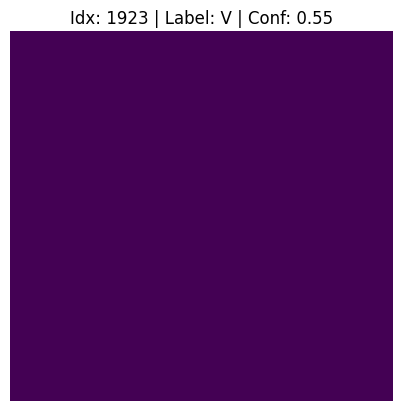

In [37]:
import matplotlib.pyplot as plt

for idx in idx_low_conf_train:
    img = train_data.iloc[idx]['image_fixed']
    label = le.inverse_transform([y_train_int[idx]])[0]
    plt.imshow(img, cmap='viridis')
    plt.title(f"Idx: {idx} | Label: {label} | Conf: {conf_train[idx]:.2f}")
    plt.axis('off')
    plt.show()


### Tentativa com remoção de labels incertos

In [38]:
import numpy as np

# Supondo idx_low_conf_train já definido como np.array ou list de índices
mask = np.ones(X_train.shape[0], dtype=bool)
mask[idx_low_conf_train] = False  # False para as linhas que serão removidas

# Aplica a máscara para remover as amostras incertas do treino
X_train_clean = X_train[mask]
y_train_clean = y_train_int[mask]


In [39]:
from sklearn.ensemble import RandomForestClassifier

clf_clean = RandomForestClassifier(n_estimators=100, random_state=42)
clf_clean.fit(X_train_clean, y_train_clean)


RandomForestClassifier(random_state=42)

In [41]:
# y_val ainda está em string. Converta para inteiro usando o mesmo encoder usado no treino!
y_val_int = le.transform(y_val)

# preds_val_clean já está em int, pode comparar diretamente:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_val_int, preds_val_clean)
print("MCC após remoção das amostras incertas:", mcc)


MCC após remoção das amostras incertas: 0.37284999333482455


### Tentativa com relabel

In [45]:
# Supondo que você já tenha:
# - X_train (features do treino)
# - y_train_int (labels do treino, inteiros)
# - probs_train (matriz de probabilidades do modelo no treino)
# - le (LabelEncoder)

# Critério de relabel
CONF_THRESHOLD = 0.50

# Para contagem/controle
total_relabel = 0
y_train_relabel = y_train_int.copy()  # Crie uma cópia para modificar

for idx in range(len(y_train_int)):
    max_prob = probs_train[idx].max()
    pred_class = probs_train[idx].argmax()
    true_class = y_train_int[idx]
    if (max_prob > CONF_THRESHOLD) and (pred_class != true_class):
        y_train_relabel[idx] = pred_class
        total_relabel += 1

print(f"Amostras relabeladas automaticamente: {total_relabel}")


Amostras relabeladas automaticamente: 9


In [46]:
clf_relabel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_relabel.fit(X_train, y_train_relabel)


RandomForestClassifier(random_state=42)

In [47]:
# Certifique-se de que y_val está em int
y_val_int = le.transform(y_val)
preds_val_relabel = clf_relabel.predict(X_val)

from sklearn.metrics import matthews_corrcoef
mcc_relabel = matthews_corrcoef(y_val_int, preds_val_relabel)
print("MCC após relabel assistido:", mcc_relabel)


MCC após relabel assistido: 0.325340522499778


### Tentativa com cleanLearning

In [49]:
from cleanlab.classification import CleanLearning
from sklearn.ensemble import RandomForestClassifier

# Seu modelo base (pode ser RandomForest, LogisticRegression, etc.)
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [50]:
cl = CleanLearning(clf=model, seed=42)  # seed para reprodutibilidade
cl.fit(X_train, y_train_int)


CleanLearning(clf=RandomForestClassifier(random_state=42),
              find_label_issues_kwargs={'confident_joint': array([[156,  21,  35,   9,  18,  21,   4,   2,   2,  14],
       [ 12,  73,  25,  26,   9,  14,  11,   4,   4,  18],
       [ 16,  20,  94,  26,  20,   7,  11,  12,   7,  12],
       [  6,  19,  22, 143,  33,  21,  12,  16,  14,  18],
       [  9,  15,  10,  49,  98,  16,  15,  17,  12,  19],
       [ 13,   6,  11,  24,   8, 118,  17,  13,   5,  27],
       [  6,  11,   9,  18,  14,  30,  82,  22,  14,  16],
       [  6,   5,  15,  23,  15,  12,  32,  77,  22,  14],
       [  0,   6,  19,  25,  12,   8,  16,  53,  90,  17],
       [ 12,   5,   7,  28,   8,  35,  13,  10,   7,  83]]),
                                        'min_examples_per_class': 10},
              seed=42)

In [51]:
preds_val_cl = cl.predict(X_val)


In [52]:
from sklearn.metrics import matthews_corrcoef

# Certifique-se de que y_val está em int (como já fez antes)
mcc_cl = matthews_corrcoef(y_val_int, preds_val_cl)
print("MCC após CleanLearning:", mcc_cl)


MCC após CleanLearning: 0.27222440160654976


In [54]:
from cleanlab.filter import find_label_issues

# probs_train: as probabilidades do modelo no próprio treino!
probs_train = cl.predict_proba(X_train)
suspeitos_cl = find_label_issues(
    labels=y_train_int,
    pred_probs=probs_train,
    return_indices_ranked_by='self_confidence'
)
print("Indices suspeitos segundo Cleanlab:", suspeitos_cl)



Indices suspeitos segundo Cleanlab: [1229 1651 1591 1579 1570  383 1561 1458  445 1405 1399 1337  505 1210
 1139 1075 1023 1010  914  896  802  322 1728  126 2305 2193 2110   62
   77 2107  114 1783 2003 1988  650  231  160  185 1923 1787  229 1949
 1858  881 1729 2252 1849 1497 1329 1330 2051 1400 1101 1759 2355  437
  299  539  142  288  370   99  571  509  104  497   40  478 2188  268
 1797  250 1254 1120  151 1762  462  333 1599  350 2067  647 2172 1241
  315 1524 1418    2 1851 1509  566 2014 2106 2143 2203  813 1152 1854
  128 2215 2225 2238 1881 1586 1132 1121 2339 1668 1657 1235 1202  877
   49 1685  652  849  569  562  204 2264  941 1742 1463 1795 2092  235
 2175 2186 1613 1274  362 2201 1221 1529  731  708   27  670 2074  751
  595 2112 1134  492  389 1860  518  533   55 1480 1965 1807  530 1110
  969 1317 1261 1589 1689 1690 1044 1824 1971 1138  440  330  766 1827
 1631  939 1542 1447  930 1525  617]


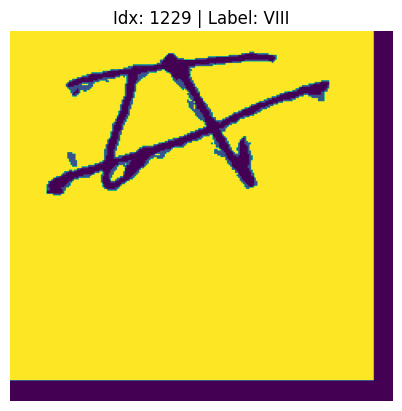

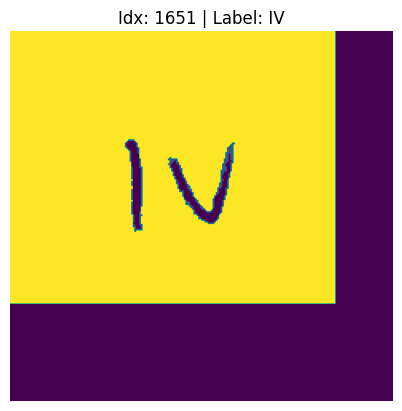

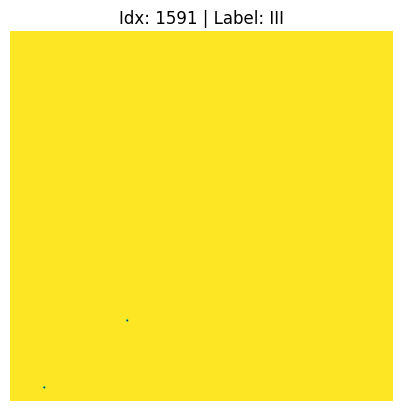

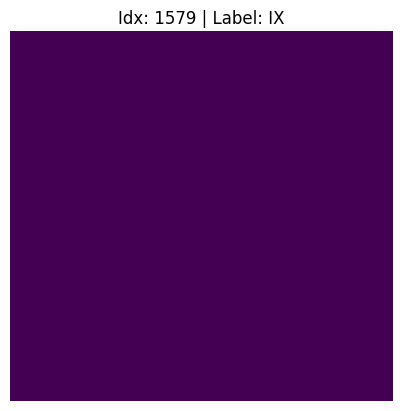

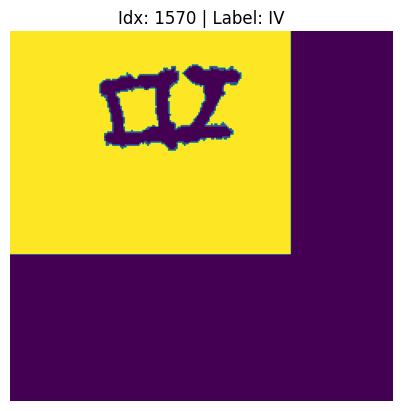

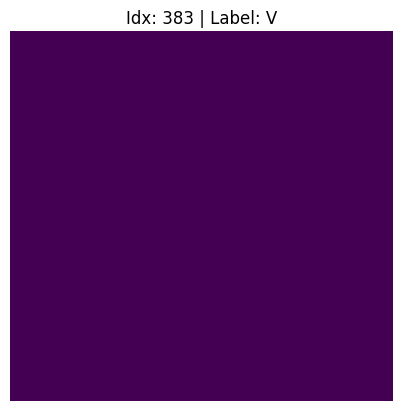

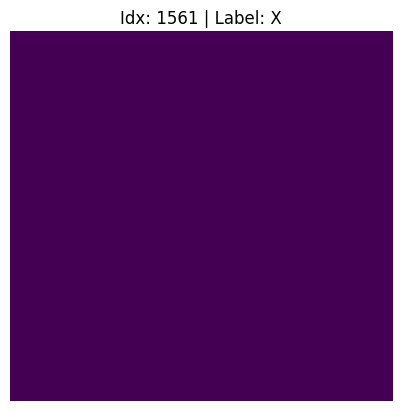

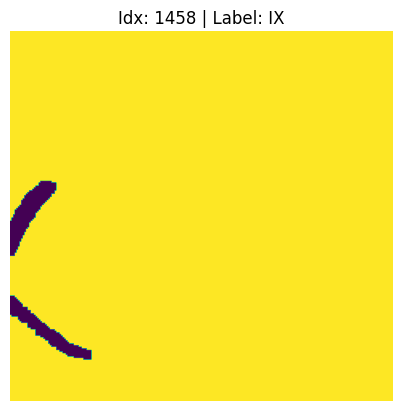

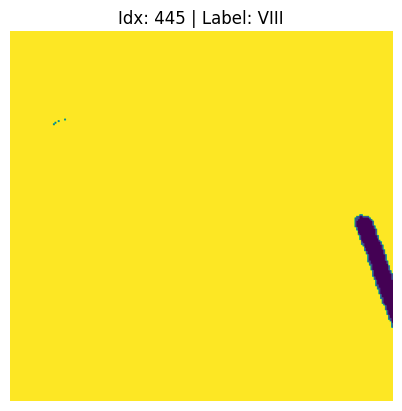

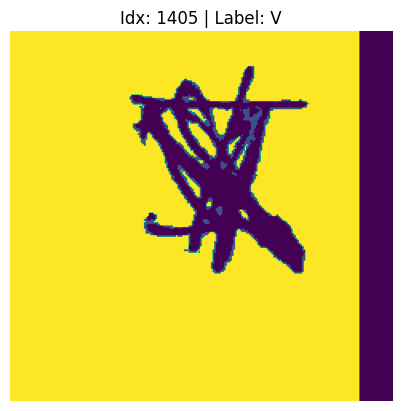

In [55]:
# Visualizar as primeiras suspeitas
import matplotlib.pyplot as plt

for idx in suspeitos_cl[:10]:
    img = train_data.iloc[idx]['image_fixed']
    label = le.inverse_transform([y_train_int[idx]])[0]
    plt.imshow(img, cmap='viridis')
    plt.title(f"Idx: {idx} | Label: {label}")
    plt.axis('off')
    plt.show()


In [56]:
import numpy as np

mask = np.ones(X_train.shape[0], dtype=bool)
mask[suspeitos_cl] = False

X_train_clean = X_train[mask]
y_train_clean = y_train_int[mask]


In [57]:
cl = CleanLearning(clf=model, seed=42)  # seed para reprodutibilidade
cl.fit(X_train, y_train_int)

CleanLearning(clf=RandomForestClassifier(random_state=42),
              find_label_issues_kwargs={'confident_joint': array([[156,  21,  35,   9,  18,  21,   4,   2,   2,  14],
       [ 12,  73,  25,  26,   9,  14,  11,   4,   4,  18],
       [ 16,  20,  94,  26,  20,   7,  11,  12,   7,  12],
       [  6,  19,  22, 143,  33,  21,  12,  16,  14,  18],
       [  9,  15,  10,  49,  98,  16,  15,  17,  12,  19],
       [ 13,   6,  11,  24,   8, 118,  17,  13,   5,  27],
       [  6,  11,   9,  18,  14,  30,  82,  22,  14,  16],
       [  6,   5,  15,  23,  15,  12,  32,  77,  22,  14],
       [  0,   6,  19,  25,  12,   8,  16,  53,  90,  17],
       [ 12,   5,   7,  28,   8,  35,  13,  10,   7,  83]]),
                                        'min_examples_per_class': 10},
              seed=42)

In [58]:
preds_val_cl = cl.predict(X_val)


In [59]:
from sklearn.metrics import matthews_corrcoef

# Certifique-se de que y_val está em int (como já fez antes)
mcc_cl = matthews_corrcoef(y_val_int, preds_val_cl)
print("MCC após CleanLearning:", mcc_cl)


MCC após CleanLearning: 0.27222440160654976


### Tentativa com embedding(PCA) e cleanLearning

In [60]:
# Supondo train_data['image_fixed'] já padronizado, cada imagem shape (h, w)
import numpy as np

X_train_flat = np.stack([img.flatten() for img in train_data['image_fixed']])
X_val_flat = np.stack([img.flatten() for img in valid_data['image_fixed']])


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)


In [66]:
from sklearn.decomposition import PCA

N_COMPONENTS = 64  
pca = PCA(n_components=N_COMPONENTS, random_state=42)
X_train_emb = pca.fit_transform(X_train_scaled)
X_val_emb = pca.transform(X_val_scaled)
print(f"Variance explained: {np.sum(pca.explained_variance_ratio_):.2%}")


Variance explained: 69.30%


In [67]:
from sklearn.ensemble import RandomForestClassifier
from cleanlab.classification import CleanLearning

model = RandomForestClassifier(n_estimators=100, random_state=42)
cl = CleanLearning(clf=model, seed=42)
cl.fit(X_train_emb, y_train_int)
preds_val_emb = cl.predict(X_val_emb)

from sklearn.metrics import matthews_corrcoef
mcc_emb = matthews_corrcoef(y_val_int, preds_val_emb)
print("MCC com embeddings (PCA) + CleanLearning:", mcc_emb)


MCC com embeddings (PCA) + CleanLearning: 0.27865457508149116


### Tentativa com embedding(autoencoder) e cleanLearning

In [68]:
# Se ainda não instalou
%pip install tensorflow


  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typing_extensions-4.13.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openai 1.31.0 requires typing-extensions<5,>=4.7, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.6.4 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.16.3 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
sqlalchemy 2.0.30 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
torch 2.3.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import numpy as np

X_train_imgs = np.stack([img for img in train_data['image_fixed']])
X_val_imgs = np.stack([img for img in valid_data['image_fixed']])

# Normaliza
X_train_imgs = X_train_imgs / 255.0
X_val_imgs = X_val_imgs / 255.0

# Adiciona canal extra (para CNNs/autoencoder conv)
X_train_imgs = X_train_imgs[..., np.newaxis]
X_val_imgs = X_val_imgs[..., np.newaxis]


In [71]:
from tensorflow.keras import layers, models

input_shape = X_train_imgs.shape[1:]  # (232, 240, 1)
input_img = keras.Input(shape=input_shape)

# Encoder
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)  # Shape: (29, 30, 8)

# Decoder
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 232, 240, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 232, 240, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 116, 120, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 120, 8)       1160      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 58, 60, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 58, 60, 8)         584   

In [72]:
# Extraia a saída do encoder
X_train_emb_ae = encoder.predict(X_train_imgs)
X_val_emb_ae = encoder.predict(X_val_imgs)

# Flatten para sklearn/classificadores tradicionais
X_train_emb_ae_flat = X_train_emb_ae.reshape(X_train_emb_ae.shape[0], -1)
X_val_emb_ae_flat = X_val_emb_ae.reshape(X_val_emb_ae.shape[0], -1)
print("Shape dos embeddings para classificação:", X_train_emb_ae_flat.shape)


14/14 [==============================] - 2s 118ms/step
Shape dos embeddings para classificação: (2406, 6960)


In [74]:
from sklearn.ensemble import RandomForestClassifier
from cleanlab.classification import CleanLearning
from cleanlab.filter import find_label_issues
import pandas as pd

# 1. Treinamento robusto e avaliação
model = RandomForestClassifier(n_estimators=100, random_state=42)
cl = CleanLearning(clf=model, seed=42)
cl.fit(X_train_emb_ae_flat, y_train_int)
preds_val_ae = cl.predict(X_val_emb_ae_flat)

from sklearn.metrics import matthews_corrcoef
mcc_ae = matthews_corrcoef(y_val_int, preds_val_ae)
print("MCC com embeddings do autoencoder + CleanLearning:", mcc_ae)

# 2. Identificação de exemplos suspeitos (noisy) no training_set
probs_train_ae = cl.predict_proba(X_train_emb_ae_flat)
suspeitos_cl = find_label_issues(
    labels=y_train_int,
    pred_probs=probs_train_ae,
    return_indices_ranked_by='self_confidence'
)

# 3. Criação da coluna is_noisy para cada uid do treino
is_noisy = [0] * len(train_data)  # 0 para não suspeito
for idx in suspeitos_cl:
    is_noisy[idx] = 1             # 1 para suspeito

# 4. Geração do DataFrame de submissão
submission = pd.DataFrame({
    "uid": train_data["uid"],
    "is_noisy": is_noisy
})

# 5. Salve o arquivo .csv
submission.to_csv("submission.csv", index=False)
print(submission.head())



MCC com embeddings do autoencoder + CleanLearning: 0.3608181630682546
                                    uid  is_noisy
0  32e9d51d-8a22-4f97-9955-8f9647a7f13c         0
1  a7c9faf9-a7e2-4687-a57b-ac0558ccee8b         0
2  0baccef4-de79-4f71-b7ec-c77cc2ab9e50         1
3  81fe9a13-d0fe-43ad-8185-c59ea6117cce         0
4  92e3b890-c9ab-4e9c-a63b-ad42de92e5a2         0
